In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sys
import os
import math
import time
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist
#loading training features ; training labels ; testing features and labels 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#astype() function also provides the capability to convert any suitable existing column to categorical type
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#batch size definition and shuffling for a better training 
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(16)

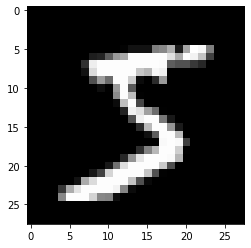

In [ ]:
first_image = x_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
# hamming_distance(x_test[2],x_test[5])

In [ ]:
#base metric gives minimum distance between two points : 
def euclidean_distance(a,b):
  z=a-b
  z=z**2
  return np.sum(z)

In [ ]:
#simply subtract subsequent values from the two images : 
def manhattan_distance(a,b):
  z=np.abs(a-b)
  return np.sum(z)


In [ ]:
#this distance will be calculated only for the same size strings or image size : 
#tells disimilar values if not same count it and return it
def hamming_distance(a,b):
  return (a != b).sum()


In [ ]:
def dot_product(a,b,i,j,filter):
  sum1=np.array(np.zeros((len(filter),len(filter[0]))),dtype=float)
  for z in range(0,len(filter)):
    for z1 in range(0,len(filter[0])):
      if(i+z<len(a) and j+z1<len(b)):
        sum1[z][z1]=a[i+z][j+z1]*filter[z][z1]
  return np.sum(sum1)

In [ ]:
#dis will apply max pooling filter throughout each matrix and at the end will apply euclidean distance to give it's value : 
#generic for any filter size and stride :
#length of filter must not exceed the image resolution.
def pooling_similarity(a,b,stride,filter):
  sum2=0
  for i in range(0,len(a)-len(filter)+1,stride):
    #only increase in row index
    if(len(filter[0])!=len(a)):
      for j in range(0,len(b)-len(filter)+1,stride):
        sum1=dot_product(a,b,i,j,filter)
        # print(sum1,'\t')
        sum2+=sum1
    else:
      sum1=dot_product(a,b,i,0,filter)
      sum2+=sum1
      # print(sum1,'\t')
  return sum2  
  print('\n')


In [ ]:
print('training sample shape : ',x_train.shape)
print('testing sample shape : ',x_test.shape)

training sample shape :  (60000, 28, 28, 1)
testing sample shape :  (10000, 28, 28, 1)


In [ ]:
a=np.array(np.zeros((3,3)),dtype=int)
b=np.array(np.zeros((3,3)),dtype=int)
a[0][0]=1
a[0][1]=2
a[2][1]=1
a[2][1]=1
a[1][2]=2
b[0][0]=1
b[1][1]=2
b[2][0]=1
b[2][2]=1
b[0][2]=2
print(a,'\n---------\n',b)
print('euclidena distance between these two will be : ',euclidean_distance(a,b))
print('manhattan distance between these two will be : ',manhattan_distance(a,b))
print('hamming distance between these two will be : ',hamming_distance(a,b))
print()

[[1 2 0]
 [0 0 2]
 [0 1 0]] 
---------
 [[1 0 2]
 [0 2 0]
 [1 0 1]]
euclidena distance between these two will be :  19
manhattan distance between these two will be :  11
hamming distance between these two will be :  7



In [ ]:
pooling_similarity(a,b,1,[[1,1],[1,1]])

11.0

In [ ]:
#resizing images and checking the difference in results
import cv2 
x_new=np.array(np.zeros((20,200,400)),dtype=float)
for i in range(20):
  x_new[i] = cv2.resize(x_test[i], (400, 200),  
                  interpolation = cv2.INTER_NEAREST)

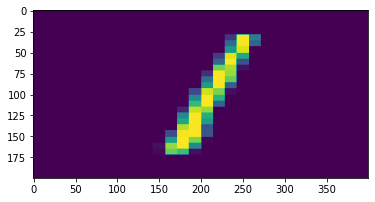

In [ ]:
plt.imshow(x_new[2])

In [ ]:
x_new.shape

(20, 200, 400)

In [ ]:
# import numpy as np
# distance_mat=np.array(np.zeros((20,20)),dtype=float)
# dist_mat=np.array(np.zeros((20,20)),dtype=float)

In [ ]:
for i in range(0,20):
  for j in range(0,20):
    if(i!=j):
      a=euclidean_distance(x_new[i],x_new[j])
      # print(a)
      b=hamming_distance(x_new[i],x_new[j])
      # print(b)
      c=manhattan_distance(x_new[i],x_new[j])
      # print(c)
      d=pooling_similarity(x_new[i],x_new[j],1,[[1,1],[1,1]])
      # print(d)
      distance_mat[i][j]=a+b+c+d+a*b*c*d
  print(i)
      # print(distance_mat)
# distance_mat

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
# dist_mat=np.copy(distance_mat)    

In [ ]:
# distance_mat=np.copy(dist_mat)

In [ ]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    #first step is to calculate the initial distance matrix
    #it consists distances from all the point to all the point
    color = ['r','g','b','y','c','m','k','w']
    # initial_distances = pairwise_distances(data,metric='euclidean')
    #making all the diagonal elements infinity 
    np.fill_diagonal(data,sys.maxsize)
    clusters = find_clusters(data,linkage) 
    
    #plotting the clusters
    iteration_number = data.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    # print(set(clusters[11]))
    # indices_to_plot = []
    # fig = plt.figure()
    # fig.suptitle('Scatter Plot for clusters')
    # ax = fig.add_subplot(1,1,1)
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # for x in np.nditer(arr):
    #     indices_to_plot.append(np.where(clusters_to_plot==x))
    # p=0
    
    return clusters_to_plot
    # for i in range(0,len(indices_to_plot)):
    #     for j in np.nditer(indices_to_plot[i]):
    #            ax.scatter(data[j,0],data[j,1], c= color[p])
    #     p = p + 1
        
    # plt.show()

In [ ]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
        
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Average Linkage
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        # print(clusters[k])
           
    return clusters

In [ ]:
a=np.array(hierarchical_clustering(distance_mat,"single",10))
# print(y_test[:100])
# cnt=0
# print(a.shape)
# cnt=0
# for i in range(20,40):
#   for j in range(20+i,40):
#     if(a[i]==a[j] and y_test[i]!=y_test[j] and i!=j):
#       cnt+=1
# cnt
# print('wrongly predicted', cnt)
print('clsuters number in which that particular value belongs to : ','\n')
print(a)
print('\n','actual values of that clusters','\n')
print('[',end='')
for i in range(20):
  print(y_test[i],' ',end='')
print(']')

{0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 13, 18}
clsuters number in which that particular value belongs to :  

[ 0  1  2  3  4  2  6  5  8  9 10 11  5 13  5  5  4  0 18  5]

 actual values of that clusters 

[7  2  1  0  4  1  4  9  5  9  0  6  9  0  1  5  9  7  3  4  ]


taking first 20 test images for the best evaluation of result :


dataset used : mnist

In [ ]:
maxim_cluster=np.max(a)
#columns will be maximum number of elements inside a cluster : which must 4 root(n)
lst=np.array(np.zeros((maxim_cluster+1,5)),dtype=int)
for i in range(maxim_cluster):
  cnt=0
  for j in range(20):
    if(i==a[j] and cnt<5):
      lst[i][cnt]=j
      cnt+=1
print(lst)
#now we need to put remaining to some other cluster and for that we must run hierarichal clustering once more : 

[[ 0 17  0  0  0]
 [ 1  0  0  0  0]
 [ 2  5  0  0  0]
 [ 3  0  0  0  0]
 [ 4 16  0  0  0]
 [ 7 12 14 15 19]
 [ 6  0  0  0  0]
 [ 0  0  0  0  0]
 [ 8  0  0  0  0]
 [ 9  0  0  0  0]
 [10  0  0  0  0]
 [11  0  0  0  0]
 [ 0  0  0  0  0]
 [13  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [ ]:
for i in range(10):
  if(i not in a):
    for j in range(20):
      if(i+j in a):
        #replace all i+j with i : 
        for z in range(20):
          if(a[z]==i+j):
            a[z]=i
        break

13

ACTUAL VALUE OF CLUSTERS : 


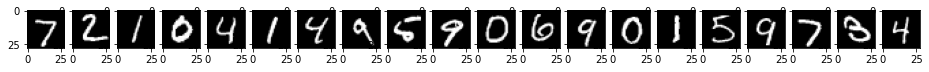

PREDICTED VALUE OF CLUSTERS : 


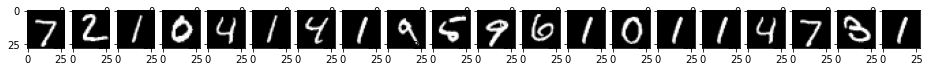

In [ ]:
print('ACTUAL VALUE OF CLUSTERS : ')
fig, axs = plt.subplots(nrows=1, ncols=20, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    # plt.imshow(a**(i+1), cmap=plt.cm.jet)
    first_image = x_test[i]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    #plt.colorbar()
    # plt.title('Image: {}'.format(i+1))

#plt.tight_layout()
# plt.suptitle('Overall Title')
plt.show()
print('PREDICTED VALUE OF CLUSTERS : ')
fig, axs = plt.subplots(nrows=1, ncols=20, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    # plt.imshow(a**(i+1), cmap=plt.cm.jet)
    first_image = x_test[a[i]]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    #plt.colorbar()
    # plt.title('Image: {}'.format(i+1))

#plt.tight_layout()
# plt.suptitle('Overall Title')
plt.show()



5 class dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [ ]:
# !pip install split-folders

In [ ]:
#reading all images
import cv2
import glob
import os
import numpy as np
# images=np.array
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/dataset/machine/*")]

In [ ]:
img=np.array(images)
img.shape

(14,)

In [ ]:
from skimage.color import rgb2gray
for i in range(14):
  img[i] = rgb2gray(img[i])

In [ ]:
img.shape

(14,)

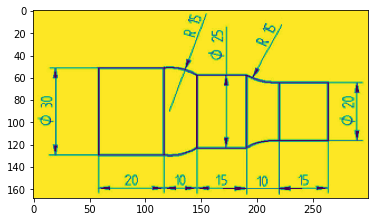

In [ ]:
plt.imshow(img[5])

In [ ]:
#resizing images and checking the difference in results
x_new=np.array(np.zeros((14,4000,4000)),dtype=float)
for i in range(14):
  x_new[i] = cv2.resize(img[i], (4000, 4000),  
                  interpolation = cv2.INTER_NEAREST)

In [ ]:
import numpy as np
distance_mat=np.array(np.zeros((14,14)),dtype=float)
dist_mat=np.array(np.zeros((14,14)),dtype=float)

In [ ]:
for i in range(0,14):
  for j in range(0,14):
    if(i!=j):
      a=euclidean_distance(x_new[i],x_new[j])
      # print(a)
      b=hamming_distance(x_new[i],x_new[j])
      # print(b)
      c=manhattan_distance(x_new[i],x_new[j])
      # print(c)
      # d=pooling_similarity(x_new[i],x_new[j],1,[[1,1],[1,1]])
      # print(d)
      distance_mat[i][j]=a+b+c+a*b*c
  print(i)
      # print(distance_mat)
# distance_mat

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [ ]:
# dist_mat=np.copy(distance_mat)

In [ ]:
distance_mat=np.copy(dist_mat)

In [ ]:
distance_mat/=np.max(distance_mat)
distance_mat

array([[8.56246787e-20, 8.56246787e-20, 8.56246787e-20, 8.56246787e-20,
        8.56246787e-20, 8.56246787e-20, 8.56246787e-20, 8.56246787e-20,
        8.56246787e-20, 8.56246787e-20, 8.56246787e-20, 8.56246787e-20,
        8.56246787e-20, 8.56246787e-20],
       [8.56246787e-20, 8.56246787e-20, 8.56246787e-20, 8.56246787e-20,
        8.56246787e-20, 8.56246787e-20, 8.56246787e-20, 8.56246787e-20,
        8.56246787e-20, 8.56246787e-20, 8.56246787e-20, 8.56246787e-20,
        8.56246787e-20, 8.56246787e-20],
       [8.56246787e-20, 8.56246787e-20, 8.56246787e-20, 3.53056331e-01,
        6.64170741e-01, 7.87002328e-01, 8.56246787e-20, 9.73713878e-01,
        9.77918367e-01, 9.73713878e-01, 3.95208909e-01, 3.60805692e-01,
        6.70733031e-01, 3.74952393e-01],
       [8.56246787e-20, 8.56246787e-20, 3.53056331e-01, 8.56246787e-20,
        2.41737003e-01, 3.09514117e-01, 8.56246787e-20, 3.78030433e-01,
        3.78686478e-01, 3.78030433e-01, 8.35768418e-02, 8.28020758e-02,
        2.537

In [ ]:
a=hierarchical_clustering(distance_mat,"single",4)
# print(y_test[:100])
# cnt=0
# print(a.shape)
# cnt=0
# for i in range(20,40):
#   for j in range(20+i,40):
#     if(a[i]==a[j] and y_test[i]!=y_test[j] and i!=j):
#       cnt+=1
# cnt
# print('wrongly predicted', cnt)
print('clsuters number in which that particular value belongs to : ','\n')
print(a)


clsuters number in which that particular value belongs to :  

[0, 1, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2]


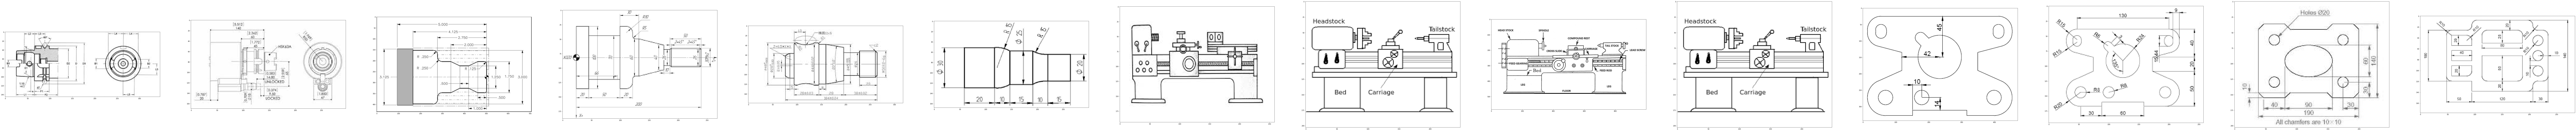

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=14, figsize=(300,300))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    # plt.imshow(a**(i+1), cmap=plt.cm.jet)
    first_image = img[i]
    first_image = np.array(first_image, dtype='float')
    # pixels = first_image.reshape((28, 28))
    plt.imshow(first_image, cmap='gray')

In [ ]:
#reading all images
import cv2
import glob
import os
import numpy as np
# images=np.array
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/dataset/new_mac/*")]

In [ ]:
img=np.array(images)
img.shape

(6,)

In [ ]:
from skimage.color import rgb2gray
for i in range(6):
  img[i] = rgb2gray(img[i])

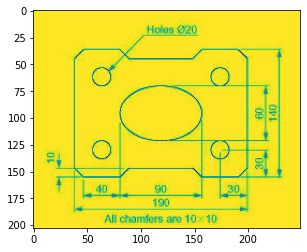

In [ ]:
plt.imshow(img[5])

In [ ]:
#resizing images and checking the difference in results
x_new=np.array(np.zeros((6,4000,4000)),dtype=float)
for i in range(6):
  x_new[i] = cv2.resize(img[i], (4000, 4000),  
                  interpolation = cv2.INTER_NEAREST)

In [ ]:
import numpy as np
distance_mat=np.array(np.zeros((6,6)),dtype=float)
dist_mat=np.array(np.zeros((8,8)),dtype=float)

In [ ]:
for i in range(0,6):
  for j in range(0,6):
    if(i!=j):
      a=euclidean_distance(x_new[i],x_new[j])
      # print(a)
      b=hamming_distance(x_new[i],x_new[j])
      # print(b)
      c=manhattan_distance(x_new[i],x_new[j])
      # print(c)
      # d=pooling_similarity(x_new[i],x_new[j],1,[[1,1],[1,1]])
      # print(d)
      distance_mat[i][j]=a+b+c+a*b*c
  print(i)
      # print(distance_mat)
# distance_mat

0
1
2
3
4
5


In [ ]:
distance_mat/=np.max(distance_mat)
distance_mat

array([[0.        , 0.95837168, 0.45521126, 0.49691698, 0.46444379,
        1.        ],
       [0.95837168, 0.        , 0.4073813 , 0.42507684, 0.46598824,
        0.67562949],
       [0.45521126, 0.4073813 , 0.        , 0.14035199, 0.12312871,
        0.41626478],
       [0.49691698, 0.42507684, 0.14035199, 0.        , 0.13800717,
        0.46654455],
       [0.46444379, 0.46598824, 0.12312871, 0.13800717, 0.        ,
        0.50342198],
       [1.        , 0.67562949, 0.41626478, 0.46654455, 0.50342198,
        0.        ]])

In [ ]:
a=hierarchical_clustering(distance_mat,"single",2)
# print(y_test[:100])
# cnt=0
# print(a.shape)
# cnt=0
# for i in range(20,40):
#   for j in range(20+i,40):
#     if(a[i]==a[j] and y_test[i]!=y_test[j] and i!=j):
#       cnt+=1
# cnt
# print('wrongly predicted', cnt)
print('clsuters number in which that particular value belongs to : ','\n')
print(a)


clsuters number in which that particular value belongs to :  

[0, 1, 1, 1, 1, 1]


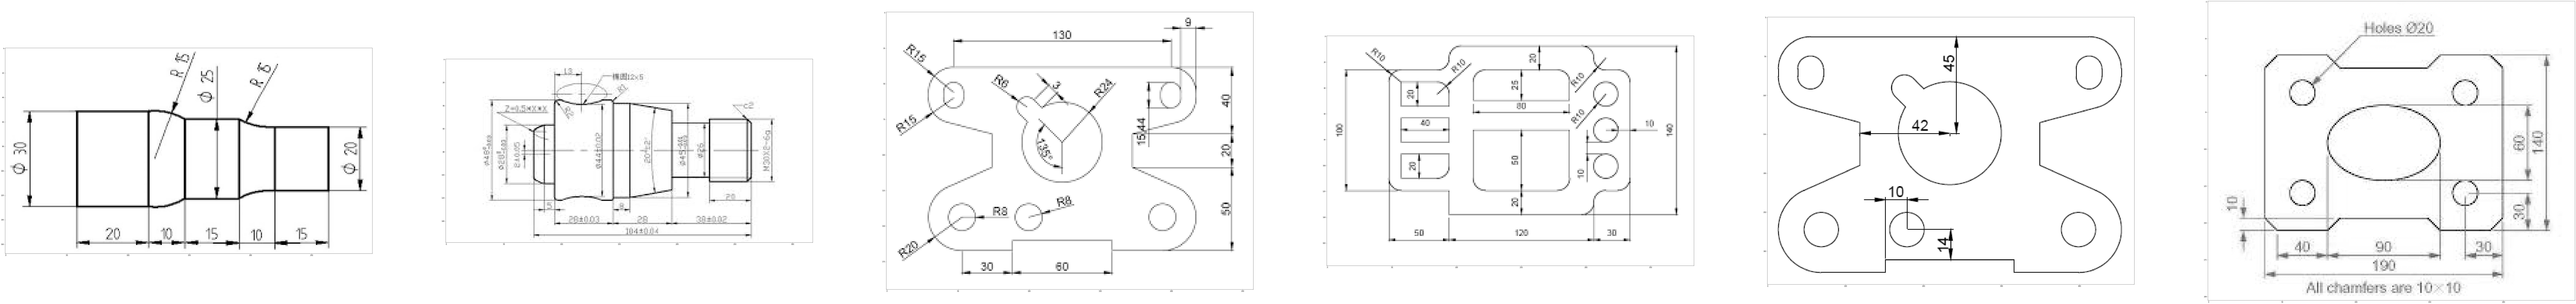

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(300,300))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    # plt.imshow(a**(i+1), cmap=plt.cm.jet)
    first_image = img[i]
    first_image = np.array(first_image, dtype='float')
    # pixels = first_image.reshape((28, 28))
    plt.imshow(first_image, cmap='gray')